In [2]:
## Gamerman and Lopes (2006) - Chapter 1

In [111]:
import numpy as np
from scipy.stats import bernoulli, binom, geom, poisson
import seaborn as sns
import pandas as pd

In [ ]:
### 1. random number generator

In [10]:
# integer
M = 5
np.random.randint(low=0, high=M)

3

In [12]:
## real
M = 1
np.random.uniform(low=0, high=M)

0.9938178103106776

### 2. Generation of discrete random quantities

In [49]:
def rand_uniform(k):
    return np.random.uniform(low=0, high=1, size=k)

def rand_bernoulli(p, u):
    x = []
    for u_i in u:
        if u_i < p:
            x.append(0)
        else:
            x.append(1)
    return x

#### Bernoulli distribution

In [60]:
u = rand_uniform(k=2)
x_bernoulli = rand_bernoulli(p=1/2, u=u)
x_bernoulli

[1, 0]

#### Binomial distribution

In [105]:
u = rand_uniform(k=10)
x_binomial = rand_bernoulli(p=1/2, u=u)
x_binomial

[1, 0, 1, 1, 0, 0, 1, 1, 0, 0]

### 3. Generation of continuous random variables

#### probability integral transform

In [121]:
def inv_cdf_exponential(u, lambd):
    x = []
    for u_i in u:
        x.append(-(1/lambd)*(np.log(1-u_i)))
    return x

def inv_cdf_weibull(u, alpha, lambd):
    # if x ~ exp(lambd) => y=x^(1/alpha) ~ weibull(alpha, lambda)
    x = inv_cdf_exponential(u, lambd)
    y = [x_i ** (1/alpha) for x_i in x]
    return y

def inv_gamma_dist(n, lambd, k):
    y = []
    for k_i in range(1, k):
        u = rand_uniform(k=100)
        x = inv_cdf_exponential(u, lambd)
        y.append(np.sum(x))
    return y

def inv_biv_normal_box_muller_1958(u1, u2):
    x1 = []
    x2 = []
    for i in range(0, len(u1)):
        u1_i = u1[i]
        u2_i = u2[i]
        x1.append(np.sqrt(-2*np.log(u1_i))*np.cos(2*np.pi*u2_i))
        x2.append(np.sqrt(-2*np.log(u1_i))*np.sin(2*np.pi*u2_i))
    return x1, x2

    

#### Exponential distribution ($\lambda > 0$)

C:\Users\daniel.oliveira\.conda\envs\quant2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

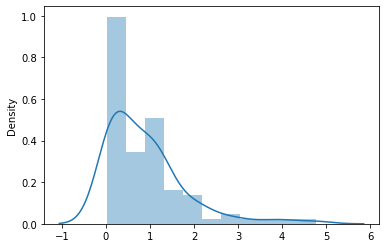

In [94]:
u = rand_uniform(k=100)
x_exponential = inv_cdf_exponential(u=u, lambd=1)
sns.distplot(x_exponential)

#### Weibull distribution ($\lambda > 0$, $\alpha > 0$ )

C:\Users\daniel.oliveira\.conda\envs\quant2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

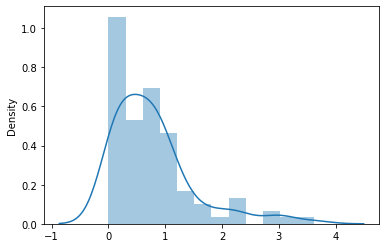

In [96]:
u = rand_uniform(k=100)
x_weibull = inv_cdf_weibull(u=u, lambd=1, alpha=1)
sns.distplot(x_weibull)

C:\Users\daniel.oliveira\.conda\envs\quant2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

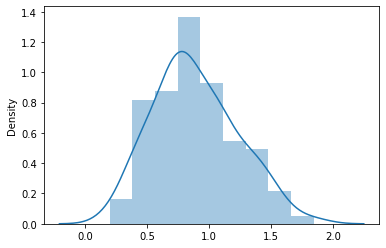

In [97]:
u = rand_uniform(k=100)
x_weibull = inv_cdf_weibull(u=u, lambd=1, alpha=3)
sns.distplot(x_weibull)

#### Gamma distribution ($\lambda > 0$, $n > 0$)

C:\Users\daniel.oliveira\.conda\envs\quant2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

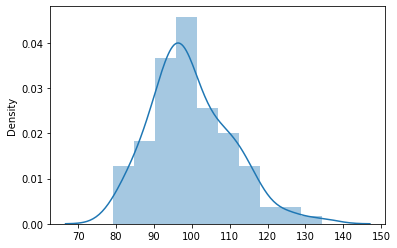

In [102]:
x_gamma = inv_gamma_dist(n=10, lambd=1, k=100)
sns.distplot(x_gamma)

#### Normal distribution ($\mu \in \mathbb{R}$, $\sigma > 0$)

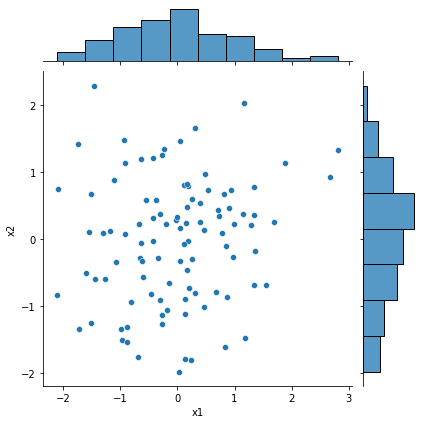

In [120]:
u1 = rand_uniform(k=100)
u2 = rand_uniform(k=100)
x1, x2 = inv_biv_normal_box_muller_1958(u1, u2)
x12_df = pd.DataFrame({'x1': x1, 'x2': x2})
sns.jointplot(data=x12_df, x="x1", y="x2")

### 3. Resampling methods

In [ ]:
def rejection_method():
    pass

def weighted_resampling_method():
    pass

def adaptative_rejection_method():
    pass
